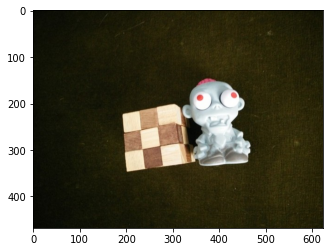

In [111]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

googly = cv2.imread("Googly.jpg")
googly = cv2.cvtColor(googly, cv2.COLOR_BGR2RGB)

plt.imshow(googly);

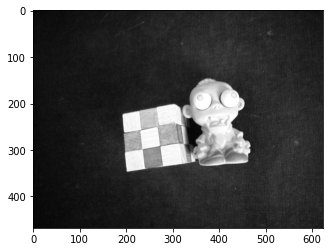

In [112]:
val = cv2.cvtColor(googly, cv2.COLOR_BGR2HSV)[:,:,2]

plt.imshow(val, cmap="gray");

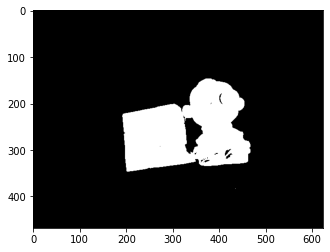

In [113]:
valthresh = 100

t, valmask = cv2.threshold(val, thresh=valthresh, maxval=255, type=cv2.THRESH_BINARY)

plt.imshow(valmask, cmap="gray");

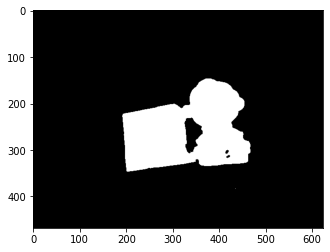

In [114]:
ellipse = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))

valmask = cv2.morphologyEx(valmask,cv2.MORPH_CLOSE,ellipse)

plt.imshow(valmask, cmap="gray");

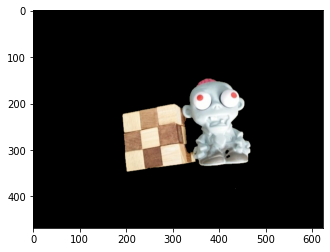

In [115]:
maskedgoogly = cv2.bitwise_and(googly,googly,mask = valmask)

plt.imshow(maskedgoogly);

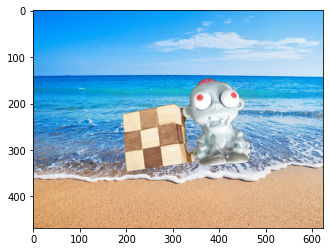

In [116]:
beach = cv2.imread("Beach.png")
beach = cv2.cvtColor(beach, cv2.COLOR_BGR2RGB)

beach = cv2.bitwise_and(beach,beach,mask = cv2.bitwise_not(valmask))

beach += maskedgoogly

plt.imshow(beach);